# 😺 Replicats.ai


No-code AIFi framework for autonomous trading AI agents. Build your agent or Copy-trade others. Powered by DAG + Foundation models. $RCAT live on Base and Sol.

 
 [https://replicats.ai/](https://replicats.ai/)

 [X (@Replicatsai)](https://x.com/Replicatsai)
 
 [Telegram (announcements): @replicatsai](t.me/replicatsai)
 
 [Telegram (community): @replicatschat](t.me/replicatschat) 


## Backtesting

[Replicats.ai](https://replicats.ai/) just deployed on Base our AI trading agent (Replicat One)! And here is a sample backtest code! See exactly how our AI agent performs before risking real capital. Backtesting simulates trading strategies against historical data to validate performance and manage risk. Check it out! See our agent's actual performance metrics and risk profile today!

### Historical Backtest

🚨 [Replicats](https://replicats.ai/) AI trading agent *CRUSHED* the Bitcoin market since 2019 (long bias strategy only - we have more... Our AI Agents strategies are *CUSTOMIZABLE*)! 📊

Starting with normalized values of "1" in 2019, the difference by today is *STAGGERING*! The y-axis shows the x-multiplier (the multiplier of the portifolio value  from the start date) at any time. The Agent (orange) outperformed a cbBTC long hold strategy (blue) in more than **40%**. These aren't cherry-picked results - this is consistent alpha generation through bull AND bear markets!


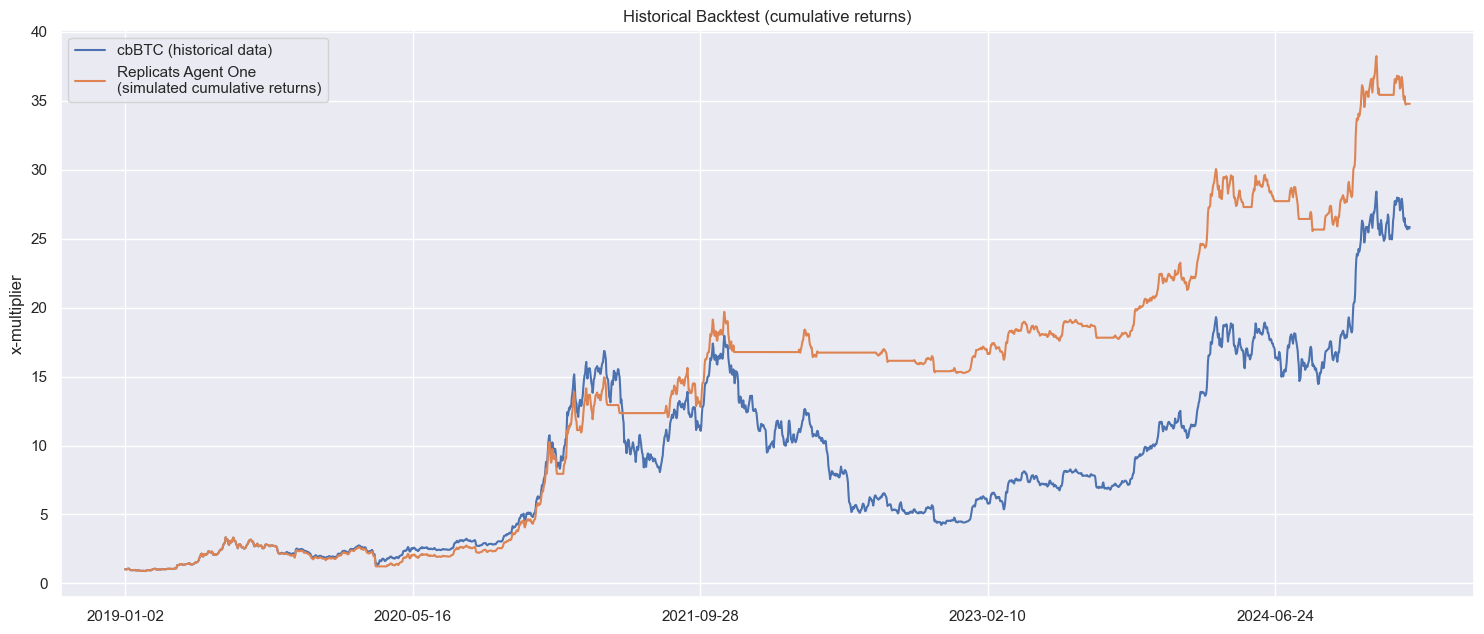

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme()

# load log-retuns for cbBTC and RCAT portifolio 
# (simulated "a posteriori" with historical market data)
path = os.path.realpath(os.path.join(os.path.abspath(''), 'log_returns.parquet'))
df = pd.read_parquet(path)

# get cumulative returns (i.e. portolio evolution)
df['cbBTC'] = df[['cbBTC.ln']].apply(np.exp).cumprod()
df['RCAT'] = df[['RCAT.ln']].apply(np.exp).cumprod()

# plot normalized cumulative returns for:
#  a) cbBTC holding portifolio
#  b) RCAT portifolio
ax = df.plot(y=['cbBTC','RCAT'], figsize=(15, 6.5), 
             title='Historical Backtest (cumulative returns)', xlabel='', ylabel='x-multiplier')
plt.tight_layout()
ax.legend(['cbBTC (historical data)', 'Replicats Agent One \n(simulated cumulative returns)']);

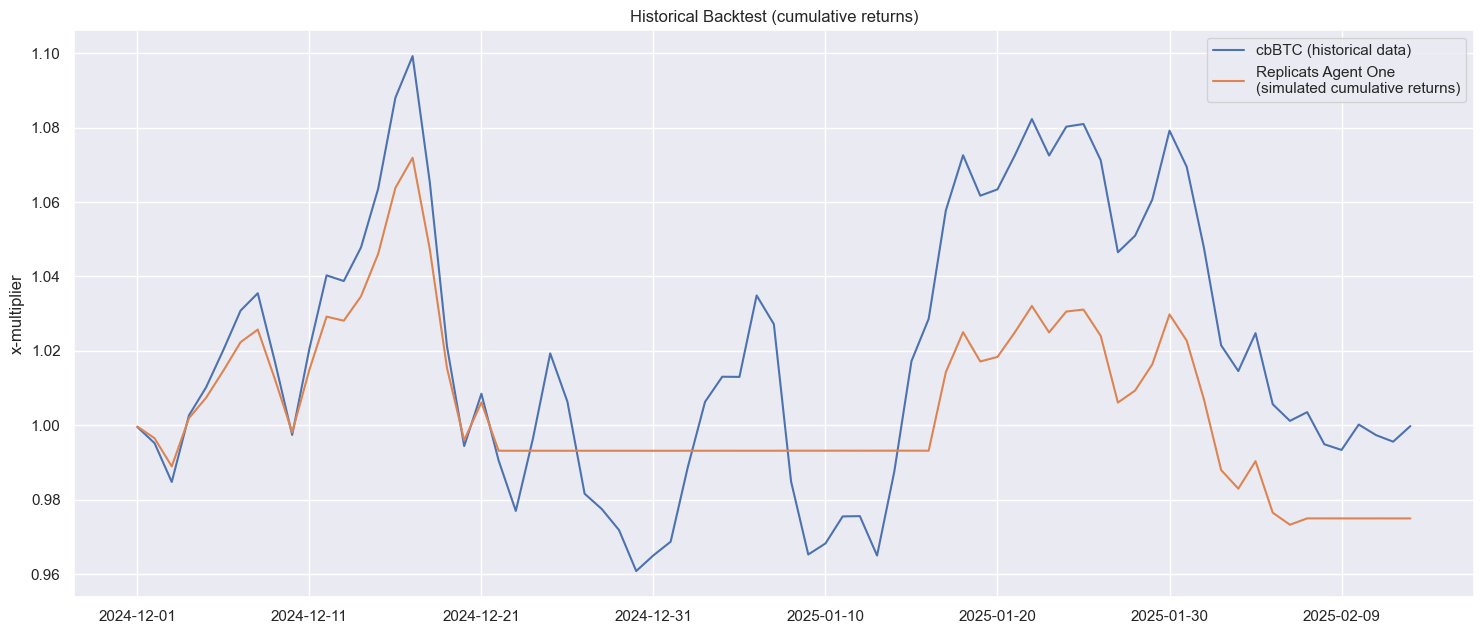

In [38]:
# get cumulative returns (i.e. portolio evolution)
df2 = df.loc['2024-12-01':'2025-02-31']
df2['cbBTC'] = df2[['cbBTC.ln']].apply(np.exp).cumprod()
df2['RCAT'] = df2[['RCAT.ln']].apply(np.exp).cumprod()

ax = df2.plot(y=['cbBTC','RCAT'], figsize=(15,6.5), 
             title='Historical Backtest (cumulative returns)', xlabel='', ylabel='x-multiplier')
plt.tight_layout()
ax.legend(['cbBTC (historical data)', 'Replicats Agent One \n(simulated cumulative returns)']);

A drawdown measures the peak-to-trough decline during a specific period. It shows how much your investment drops before recovering. For example: If $BTC goes from $60K → $30K, that's a 50% drawdown.

Here's the *SHOCKING* part: [Replicats](https://replicats.ai/) AI trading agent experienced only *28%* of Bitcoin's worst drawdown! 🤯

While hodlers watched their portfolios crater during major corrections, Replicats Agent preserved capital by:

✅ Recognizing early warning signals

✅ Adjusting position sizing dynamically

✅ Utilizing strategic hedging

Lower drawdowns = better compounding = significantly higher long-term wealth.


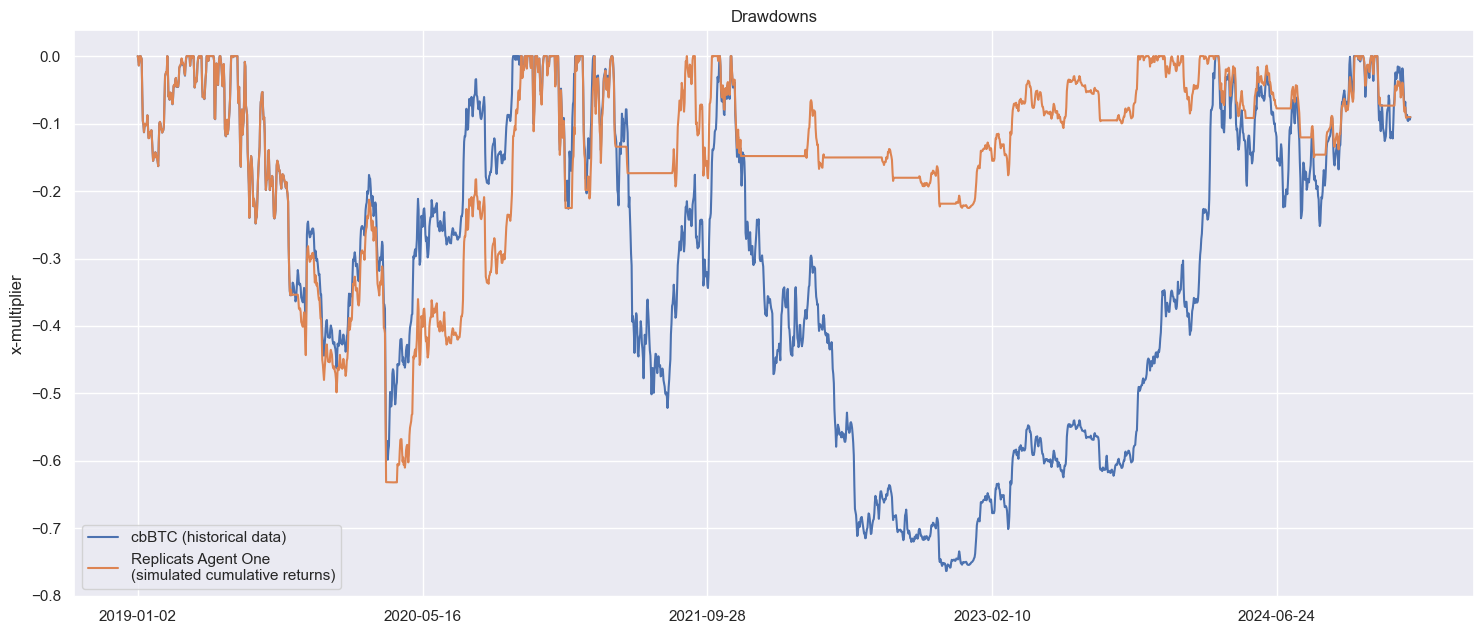

In [ ]:
# evaluates downdowns
from backtest import drawdowns
df['cbBTC.drawdown'], _, _, _ = drawdowns(df['cbBTC.ln'])
df['RCAT.drawdown'], _, _ , _ = drawdowns(df['RCAT.ln'])

ax = df.plot(y=['cbBTC.drawdown','RCAT.drawdown'], 
        figsize=(15,6.5), title='Drawdowns', xlabel='', ylabel='x-multiplier')
plt.tight_layout()
ax.legend(['cbBTC (historical data)', 'Replicats Agent One \n(simulated cumulative returns)']);

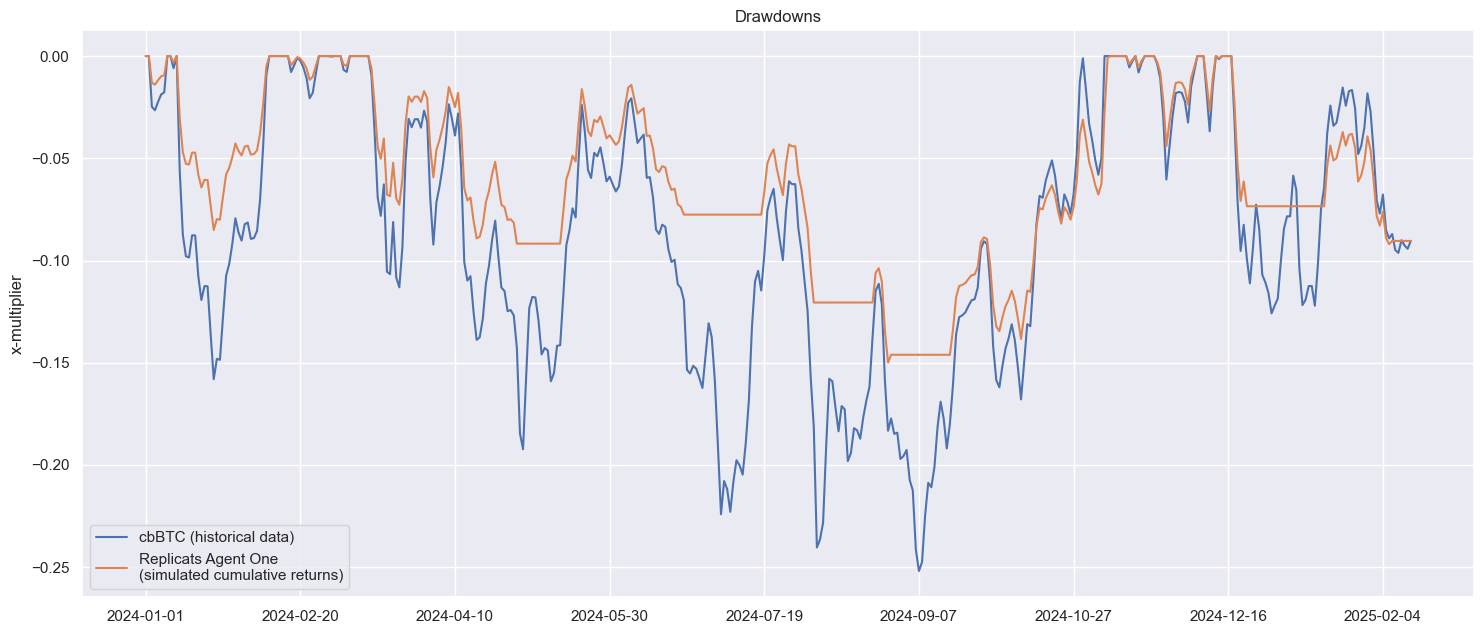

In [ ]:
# evaluates downdowns
df2 = df.loc['2024-01-01':'2025-02-31']
df2['cbBTC.drawdown'], _, _, _ = drawdowns(df2['cbBTC.ln'])
df2['RCAT.drawdown'], _, _ , _ = drawdowns(df2['RCAT.ln'])

ax = df2.plot(y=['cbBTC.drawdown','RCAT.drawdown'], 
        figsize=(15,6.5), title='Drawdowns', xlabel='', ylabel='x-multiplier')
plt.tight_layout()
ax.legend(['cbBTC (historical data)', 'Replicats Agent One \n(simulated cumulative returns)']);

### Risk-Adjusted Return Metrics

🔍 Risk-Return Metrics Every Smart Crypto Trader Needs to Know 📊

Most traders only focus on gains, but the PROS measure risk-adjusted returns. Here's what separates winners from gamblers:

1️⃣ Sharpe Ratio: The OG risk metric. Higher = better risk-adjusted returns. Measures excess return per unit of total risk.

2️⃣ Sortino Ratio: Sharpe's evolved cousin. Only penalizes DOWNSIDE risk rather than all volatility. Perfect for crypto where we love upward volatility!

3️⃣ Calmar Ratio: Crucial for surviving bear markets! Measures return relative to maximum drawdown. Shows how well you recover from worst-case scenarios.

4️⃣ Treynor Ratio: Evaluates excess return per unit of SYSTEMATIC risk. Shows how efficiently you're compensated for market-correlated risk.

5️⃣ Information Ratio: Measures your edge! Shows excess returns compared to a benchmark relative to tracking error. Active management skill quantified.

6️⃣ Omega Ratio: The comprehensive metric. Considers ENTIRE return distribution rather than just averages. No assumptions about distribution shape!

🚨 Backtesting Replicats AI trading agent vs. simple BTC holding since 2019: [Replicats](https://replicats.ai/) OUTPERFORMS Bitcoin on EVERY SINGLE metric above!

In [41]:
# risk free rate
rf=0.0442
# rolling window
window = 63

from backtest import calculate_ratios
ratios_cbBTC = calculate_ratios(df['cbBTC.ln'], risk_free_rate=rf, rolling_window=window)
ratios_RCAT = calculate_ratios(df['RCAT.ln'], risk_free_rate=rf, rolling_window=window)

import tabulate
data = [
    ['Risk-Adjusted Return Metrics', 'cbBTC (historical)','😺 Replicats Agent One'],
    ['Sharpe Ratio', f'{ratios_cbBTC['sharpe_ratio']:.4f}', f'{ratios_RCAT['sharpe_ratio']:.4f}'],
    ['Sortino Ratio', f'{ratios_cbBTC['sortino_ratio']:.4f}', f'{ratios_RCAT['sortino_ratio']:.4f}'],
    ['Calmar Ratio', f'{ratios_cbBTC['calmar_ratio']:.4f}', f'{ratios_RCAT['calmar_ratio']:.4f}'],
    ['Treynor Ratio', f'{ratios_cbBTC['treynor_ratio']:.4f}', f'{ratios_RCAT['treynor_ratio']:.4f}'],
    ['Information Ratio', f'{ratios_cbBTC['information_ratio']:.4f}', f'{ratios_RCAT['information_ratio']:.4f}'],
    ['Omega Ratio', f'{ratios_cbBTC['omega_ratio']:.4f}', f'{ratios_RCAT['omega_ratio']:.4f}'],
    
    ['Market Risk Metrics','cbBTC (historical)','😺 Replicats Agent One'],
    ['Annualized Return', f'{ratios_cbBTC['annualized_return']:.2%}', f'{ratios_RCAT['annualized_return']:.2%}'],
    ['Annualized Volatility', f'{ratios_cbBTC['annualized_volatility']:.2%}', f'{ratios_RCAT['annualized_volatility']:.2%}'],
    ['Maximum Drawdown', f'{ratios_cbBTC['calmar_ratio']:.2%}', f'{ratios_RCAT['calmar_ratio']:.2%}'],
    ['Treynor Ratio', f'{ratios_cbBTC['max_drawdown']:.4f}', f'{ratios_RCAT['max_drawdown']:.4f}'],
    ['Drawdown Duration', f'{ratios_cbBTC['drawdown_duration']} days', f'{ratios_RCAT['drawdown_duration']} days'],
    ['Beta', f'{ratios_cbBTC['beta']:.4f}', f'{ratios_RCAT['beta']:.4f}'],
]
display(tabulate.tabulate(data, tablefmt='html'))


Risk-Adjusted Return Metrics,cbBTC (historical),😺 Replicats Agent One
Sharpe Ratio,1.0258,1.4248
Sortino Ratio,1.0025,1.4128
Calmar Ratio,0.6768,1.0455
Treynor Ratio,0.4910,0.6302
Information Ratio,19.5972,27.2212
Omega Ratio,1.1429,1.1890
Market Risk Metrics,cbBTC (historical),😺 Replicats Agent One
Annualized Return,51.66%,66.05%
Annualized Volatility,47.56%,37.64%
Maximum Drawdown,67.68%,104.55%


### Rolling risk-adjusted returns

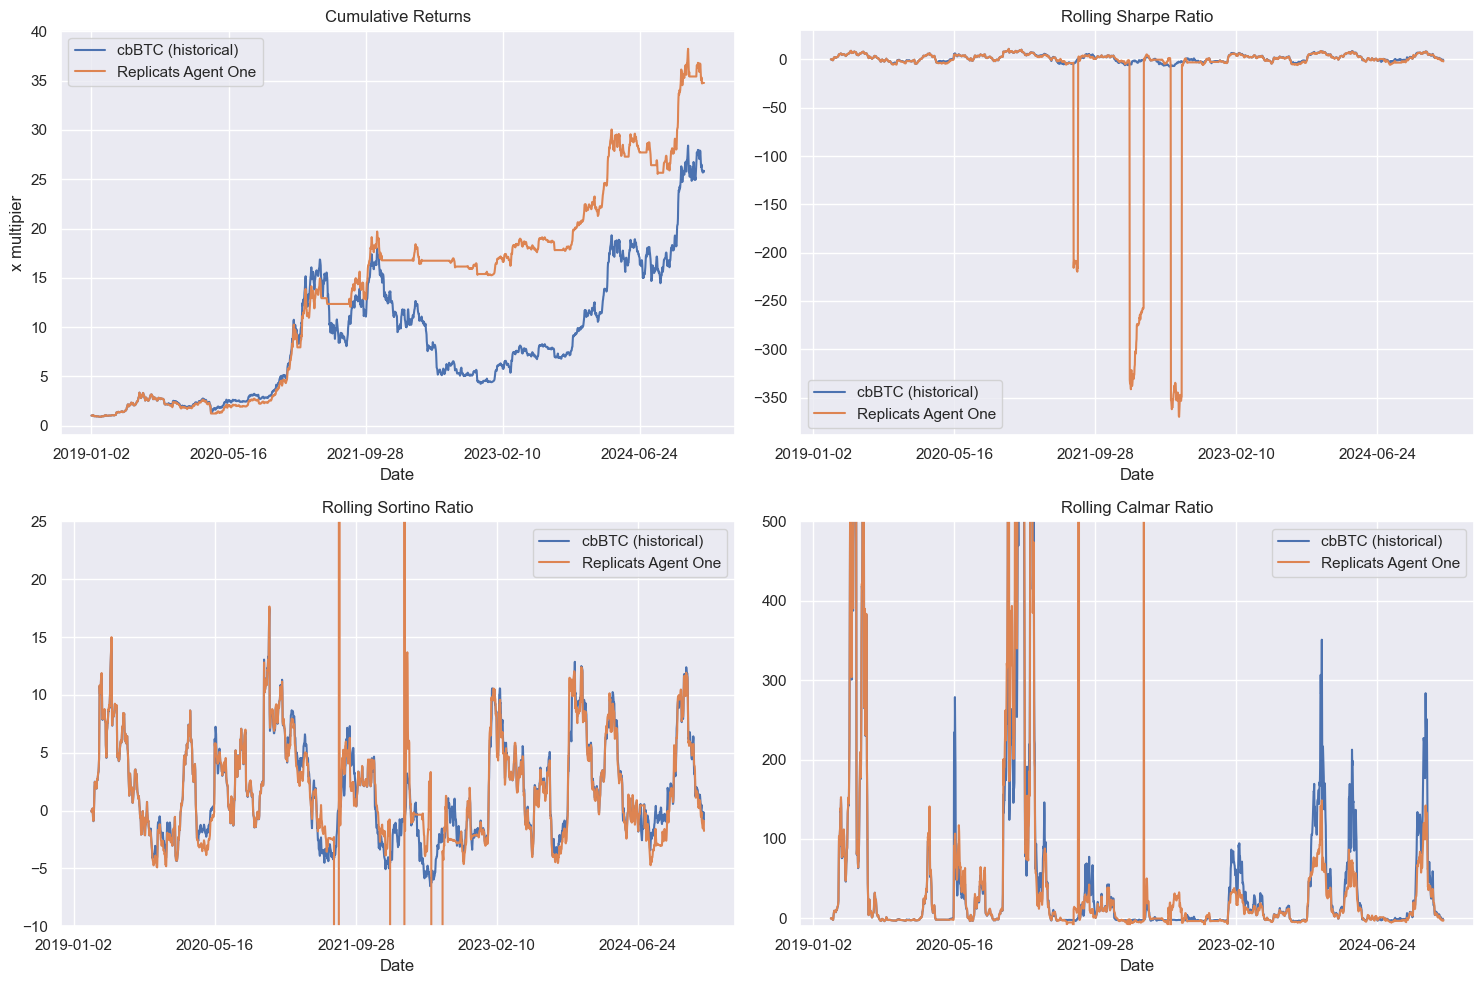

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot cumulative returns
df['cbBTC'].plot(ax=ax1, title='Cumulative Returns')
df['RCAT'].plot(ax=ax1)
ax1.set_ylabel('x multipier')
ax1.legend(["cbBTC (historical)", "Replicats Agent One"], loc='upper left')

# Plot rolling ratios
ratios_cbBTC['rolling_sharpe_ratio'].plot(ax=ax2, title='Rolling Sharpe Ratio')
ratios_RCAT['rolling_sharpe_ratio'].plot(ax=ax2)
ax2.legend(["cbBTC (historical)", "Replicats Agent One"])
        
ratios_cbBTC['rolling_sortino_ratio'].plot(ax=ax3, title='Rolling Sortino Ratio')
ratios_RCAT['rolling_sortino_ratio'].plot(ax=ax3, ylim=(-10, 25))
ax3.legend(["cbBTC (historical)", "Replicats Agent One"])

ratios_cbBTC['rolling_calmar_ratio'].plot(ax=ax4, title='Rolling Calmar Ratio')
ratios_RCAT['rolling_calmar_ratio'].plot(ax=ax4, ylim=(-10, 500))
ax4.legend(["cbBTC (historical)", "Replicats Agent One"])

plt.tight_layout()
plt.show()

## Risk Metrics

🚨 Value at Risk (VaR): The maximum expected loss within a specific confidence level (usually 95% or 99%). Tells you "I'm 95% confident we won't lose more than X%."

🚨 Conditional VaR (CVaR): Also called Expected Shortfall, measures the average loss in the worst-case scenarios beyond VaR. If VaR shows the minimum of the worst outcomes, CVaR shows their average.

🚨 Modified VaR (MVaR): Improves on traditional VaR by accounting for skewness and kurtosis in returns. Critical for crypto's non-normal distributions!

🔍 RESULTS: [Replicats](https://replicats.ai/) AI trading agent scores LOWER on ALL risk metrics vs. simply holding BTC. Lower VaR, lower CVaR, lower MVaR = *MUCH BETTER RISK-ADJUSTED RETURNS*.

This isn't just about gains—it's about sleeping well at night while your portfolio grows! 👇

In [43]:
from backtest import calculate_var_metrics, calculate_tracking_metrics

confidence_level = 0.95

# rebuild actual price series from cumulative returns
px_last = 96900.99 #  @Feb, 13th

var_cbBTC = calculate_var_metrics(df['cbBTC.ln'], confidence_level)
var_RCAT = calculate_var_metrics(df['RCAT.ln'], confidence_level)
te = calculate_tracking_metrics(df['RCAT.ln'], df['cbBTC.ln'])

data = [
    ['Value at Risk', 'cbBTC (historical)','😺 Replicats Agent One'],
    [f'VaR ({confidence_level:.0%})', f'{px_last*(np.exp(var_cbBTC['historical_var'])-1):.2f}', f'{px_last*(np.exp(var_RCAT['historical_var'])-1):.2f}'],
    [f'MVaR ({confidence_level:.0%})', f'{px_last*(np.exp(var_cbBTC['conditional_var'])-1):.2f}', f'{px_last*(np.exp(var_RCAT['conditional_var'])-1):.2f}'],
    [f'CVaR ({confidence_level:.0%})', f'{px_last*(np.exp(var_cbBTC['modified_var'])-1):.2f}', f'{px_last*(np.exp(var_RCAT['modified_var'])-1):.2f}'],
    ['', 'Benchmark Comparison',''],
    ['Tracking Error', f'{te['tracking_error']:.2f}',''],
    ['Information Ratio', f'{te['information_ratio']:.2f}',''],
    ['Alpha', f'{te['alpha']:.2f}',''],
    ['Beta', f'{te['beta']:.2f}',''],
    ['r2', f'{te['r_squared']:.2f}',''],
    ['Up Capture', f'{te['up_capture']:.2%}',''],
]
display(tabulate.tabulate(data, tablefmt='html'))

Value at Risk,cbBTC (historical),😺 Replicats Agent One
VaR (95%),-3550.85,-2408.01
MVaR (95%),-5458.78,-4340.34
CVaR (95%),-3237.71,-1735.07
,Benchmark Comparison,
Tracking Error,0.29,
Information Ratio,0.17,
Alpha,0.24,
Beta,0.63,
r2,0.64,
Up Capture,64.80%,


## Stressed Risk

Ever wonder how sophisticated traders predict potential losses in volatile crypto markets? 

Monte Carlo simulations are powerful statistical tools that generate thousands of random price paths to model possible future outcomes. When combined with Geometric Brownian Motion (GBM), they capture the random walk nature of crypto prices.

Why this matters for YOUR portfolio:

Stressed Value at Risk (VaR) uses these simulations to estimate maximum potential losses under extreme market conditions. Unlike standard VaR, stressed VaR incorporates historical crisis periods to prepare for worst-case scenarios.

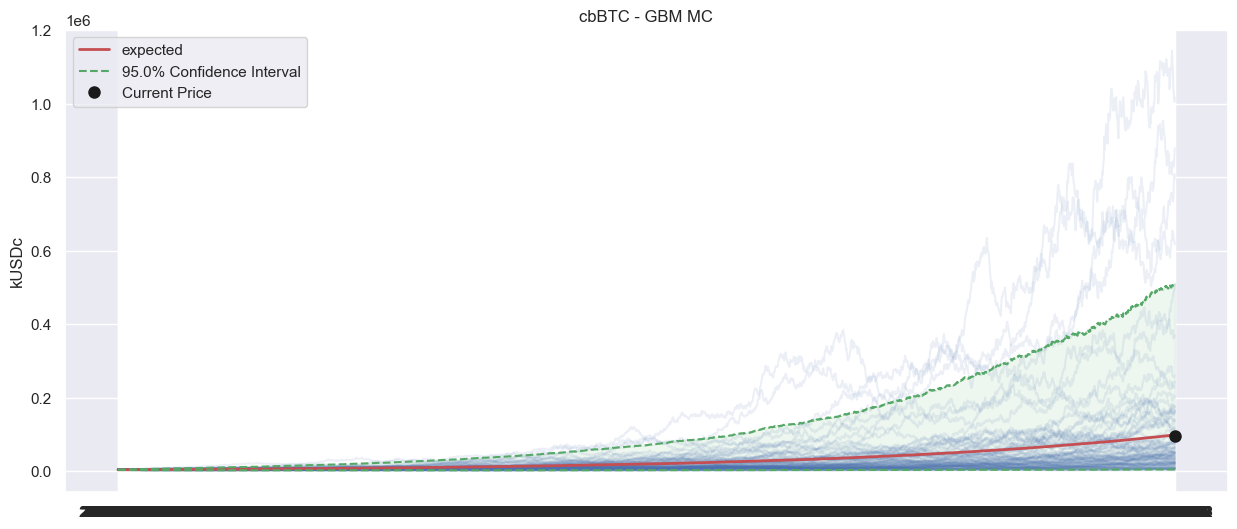

In [44]:
from backtest import monte_carlo_backtest

# plot MC cbBTC
times = df.index.values
mcvar_cbBTC = monte_carlo_backtest(df['cbBTC.ln'], px_last, 10000, confidence_level, times, 'cbBTC - GBM MC')

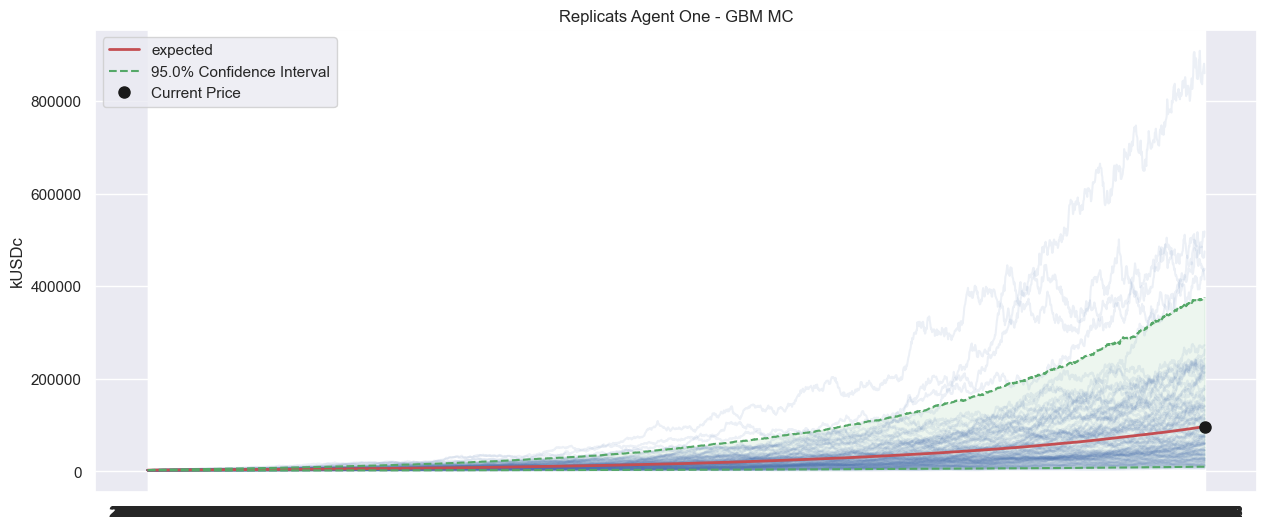

In [45]:
# plot MC RCAT
times = df.index.values
mcvar_RCAT = monte_carlo_backtest(df['RCAT.ln'], px_last, 10000, confidence_level, times, 'Replicats Agent One - GBM MC')

Results?

😺 27% reduction in VaR

😺 More efficient capital allocation

😺 Sleep-at-night factor 📈

In [46]:
n_simulations = 50000
times = df.index.values

mcvar_cbBTC = monte_carlo_backtest(df['cbBTC.ln'], px_last, n_simulations, confidence_level)
mcvar_RCAT = monte_carlo_backtest(df['RCAT.ln'], px_last, n_simulations, confidence_level)

data = [
     [f'Stressed Backtest (MC: {n_simulations} scenarios)', 'cbBTC (stressed)','😺 Replicats Agent One (stressed)'],
     [f'Expected Return', f'{mcvar_cbBTC['expected_return']:.2%}', f'{mcvar_RCAT['expected_return']:.2%}'],
     [f'Value at Risk ({confidence_level:.0%})', f'{mcvar_cbBTC['var']:.2f}', f'{mcvar_RCAT['var']:.2f}'],
     [f'Conditional VaR ({confidence_level:.0%})', f'{mcvar_cbBTC['cvar']:.2f}', f'{mcvar_RCAT['cvar']:.2f}'],
     [f'Average Max Drawdown ({confidence_level:.0%})', f'{mcvar_cbBTC['max_drawdown']:.2%}', f'{mcvar_RCAT['max_drawdown']:.2%}'],
]
display(tabulate.tabulate(data, tablefmt='html'))

Stressed Backtest (MC: 50000 scenarios),cbBTC (stressed),😺 Replicats Agent One (stressed)
Expected Return,2478.86%,3379.31%
Value at Risk (95%),-1435.92,-1046.52
Conditional VaR (95%),-2418.65,-1786.50
Average Max Drawdown (95%),-99.27%,-99.95%


### Stressed VaR by Bootstrap Scenario Simulation 

In volatile crypto markets, standard VaR (Value at Risk) often UNDERESTIMATES tail risks during black swan events like March 2020 or FTX collapse. Enter Bootstrap Scenario Simulation - a powerful technique, alternative do Monte Carlo simulation. Here's how it works:

1️⃣ Bootstrap Scenario Simulation randomly resamples historical returns to create thousands of potential market paths

2️⃣ For Stressed VaR, we specifically oversample from periods of extreme market stress (bear markets, liquidity crises, correlation breakdowns)

3️⃣ This creates a more robust risk assessment than standard VaR by capturing fat-tail scenarios that traditional models miss

Why are smart crypto funds adopting this?
 - Historical correlations breaking down in macro regime shift
 - DeFi protocols need better risk metrics for institutional adoption

In [47]:
from backtest import bootstrap_backtest

n_samples=100000
bootstrap_cbBTC = bootstrap_backtest(df['cbBTC.ln'], n_samples=n_samples, sample_length=365)
bootstrap_RCAT = bootstrap_backtest(df['RCAT.ln'], n_samples=n_samples, sample_length=365)

percentile = [int(100 * (1-confidence_level)), int(100 * confidence_level)] 

data = [
    [f'Bootstrap Analysis ({n_samples} samples)', 'cbBTC (stressed)','😺 Replicats Agent One (stressed)'],
    [f'Mean Annual Return', f'{np.mean(bootstrap_cbBTC):.2%}', f'{np.mean(bootstrap_RCAT):.2%}'],
    [f'Return Std Dev', f'{np.std(bootstrap_cbBTC):.2%}', f'{np.std(bootstrap_RCAT):.2%}'],    
    [f'{percentile[0]}th Percentile Return', f'{np.percentile(bootstrap_cbBTC, percentile[0]):.2%}', f'{np.percentile(bootstrap_RCAT, percentile[0]):.2%}'],
    [f'{percentile[1]}th Percentile Return', f'{np.percentile(bootstrap_cbBTC, percentile[1]):.2%}', f'{np.percentile(bootstrap_RCAT, percentile[1]):.2%}'],
]
display(tabulate.tabulate(data, tablefmt='html'))

Bootstrap Analysis (100000 samples),cbBTC (stressed),😺 Replicats Agent One (stressed)
Mean Annual Return,70.11%,78.61%
Return Std Dev,85.58%,69.63%
5th Percentile Return,-31.31%,-12.12%
95th Percentile Return,231.45%,208.58%


---
<small>Copyright (2025), 😺 [Replicats.ai](https://replicats.ai/)<br>
All rights reserved</small>